Парадокс инспектора

Биноминальное распределение


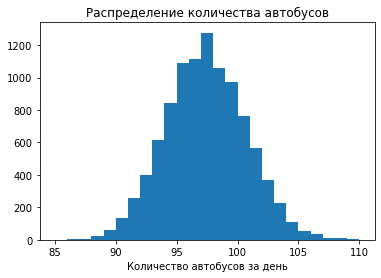

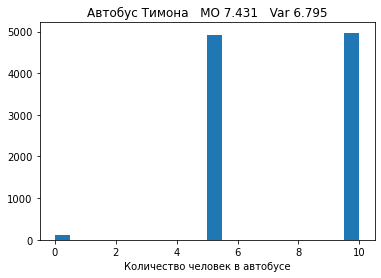

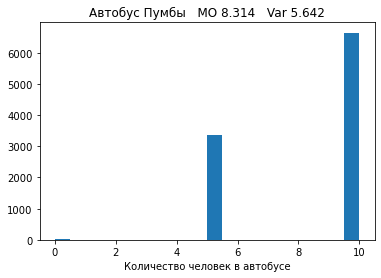

Экспаненциальное распределение


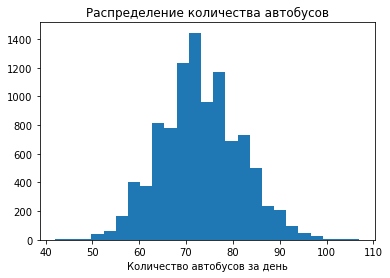

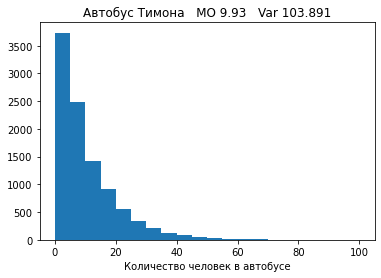

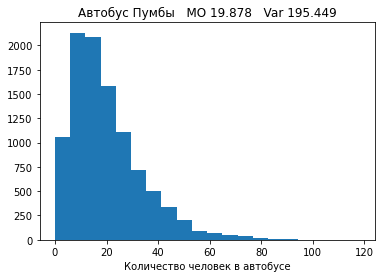

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import random

#Генерация
N = 10**4
def Nomer(A):
    B = np.array([0] * N).reshape((-1,1))
    A = np.hstack((B, A))
    DATA = np.cumsum(A, axis=1)
    #Пункт 1
    Bus_count = np.sum(DATA <= 720, axis=1)
    plt.title('Распределение количества автобусов')
    plt.xlabel('Количество автобусов за день')
    plt.hist(Bus_count, bins = 25)
    plt.show()
    #Пункт 2
    answer = []
    for i in range(N):
        random.seed(7777)
        y = np.random.randint(0, Bus_count, 1)
        answer.append(int(A[i][y]))
    plt.title('Автобус Тимона   МO ' + str(round(sum(answer) / N, 3)) + '   Var ' + str(round(np.var(answer), 3)))
    plt.hist(answer, bins = 20)
    plt.xlabel('Количество человек в автобусе')
    plt.show()
    #Пункт 3
    random.seed(7777)
    Time_from_start = np.random.randint(0, 721, (N, 1))
    Bus_number = list(np.sum(DATA < Time_from_start, axis=1))
    Bus_type = []
    for i in range(N):
        Bus_type.append(A[i, Bus_number[i]])
    plt.hist(Bus_type, bins = 20)
    plt.title('Автобус Пумбы   МO ' + str(round(sum(Bus_type) / N, 3)) + '   Var ' + str(round(np.var(Bus_type), 3)))
    plt.xlabel('Количество человек в автобусе')
    plt.show()

np.random.seed(7777)
Gen1 = 5 * (np.random.binomial(n = 1, p = 0.5, size = (N, 144)) + 1)
np.random.seed(7777)
Gen2 = np.around(np.random.exponential(10, size = (N, 200)))
print('Биноминальное распределение')
Nomer(Gen1)
print('Экспаненциальное распределение')
Nomer(Gen2)

Атос, Портос и Арамис

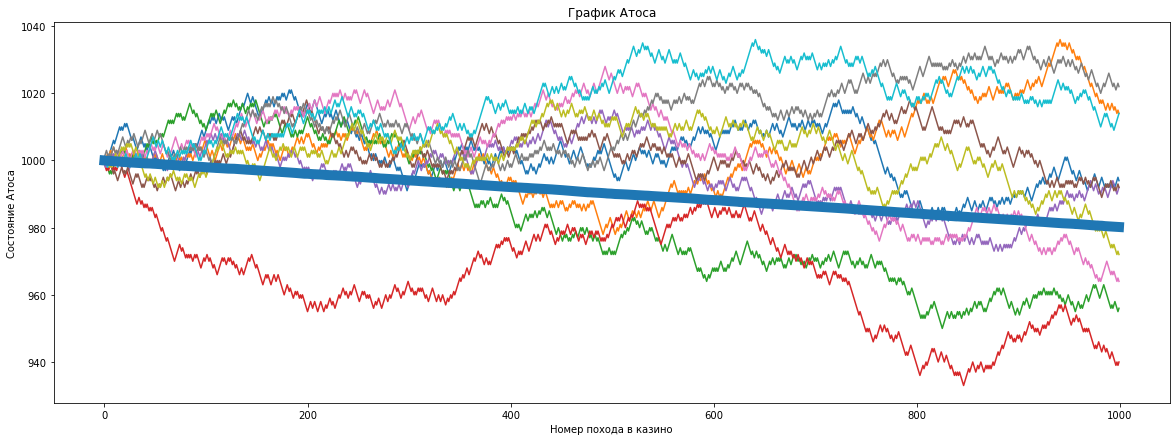

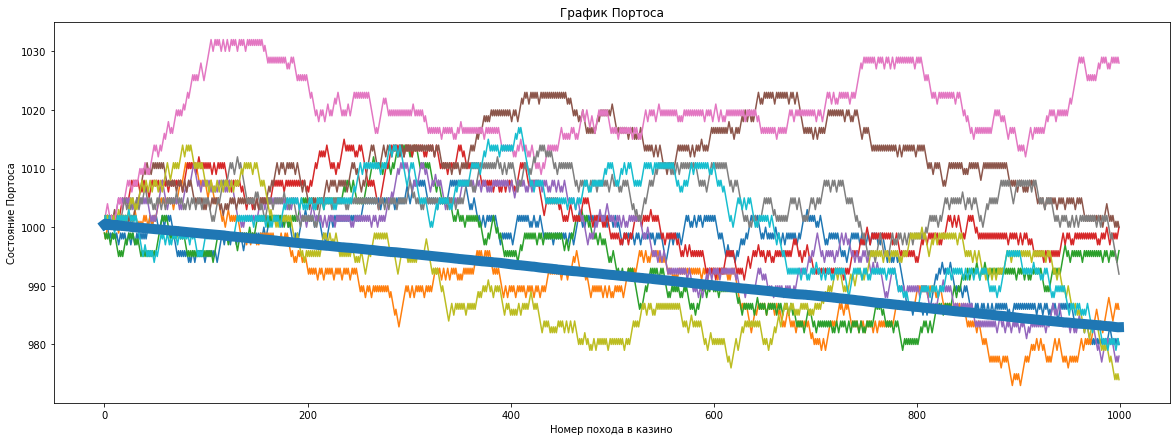

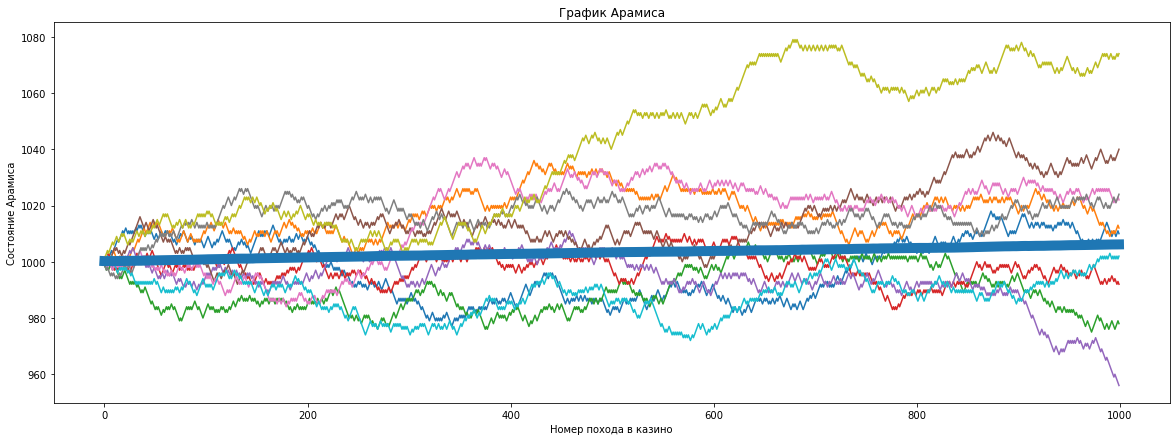

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import random
N = 10**4

def Kazino_B(Mas):
    Kratno = np.random.choice([-1, 1], N, p=[0.91, 0.09]) #кратно 3
    NeKratno = np.random.choice([-1, 1], N, p=[0.26, 0.74]) #не кратно 3
    Sost = 1000 + np.sum(Mas, axis = 1)
    Stolb = np.array(Sost % 3 == 0) * Kratno + np.array(Sost % 3 != 0) * NeKratno
    return(Stolb)

def Graf(Mas, Name):
    plt.figure(figsize=(20,7));
    plt.title('График ' + Name + 'а')
    plt.xlabel('Номер похода в казино')
    plt.ylabel('Состояние ' + Name + 'a')
    for i in range(10):
        plt.plot(Mas[np.random.randint(0, N + 1)])
    plt.plot(np.sum(Mas, axis=0) / N, linewidth=10)
    plt.show()

#ATOS
Atos = 1000 + np.cumsum(np.random.choice([-1, 1], (N, 1000), p=[0.51, 0.49]), axis = 1)
Graf(Atos, 'Атос')

#PORTOS
Portos = np.random.choice([-1, 1], N, p=[0.26, 0.74]).reshape((N, 1))
for i in range(999):
    Portos = np.hstack((Portos, np.reshape(Kazino_B(Portos), (N, 1))))
Portos = 1000 + np.cumsum(Portos, axis = 1)
Graf(Portos, 'Портос')

#ARAMIS
Aramis = np.random.choice([-1, 1], N, p=[0.385, 0.615]).reshape((N, 1))
for i in range(999):
    Kaz_choice = np.random.choice([1, 0], N)
    Kaz_A = np.random.choice([-1, 1], N, p=[0.51, 0.49])
    Kaz_choice_obr = Kaz_choice == 0
    Stolb = Kaz_choice * Kaz_A + Kaz_choice_obr * Kazino_B(Aramis)
    Aramis = np.hstack((Aramis, np.reshape(Stolb, (N, 1))))
Aramis = 1000 + np.cumsum(Aramis, axis = 1)
Graf(Aramis, 'Арамис')

Урюпинская школа экономики

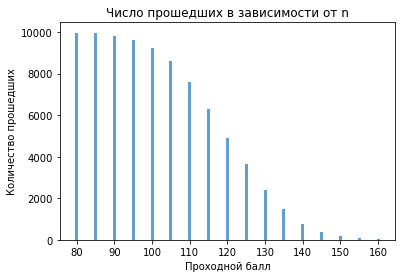

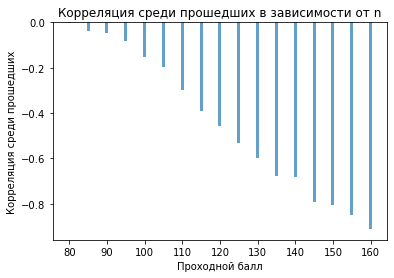

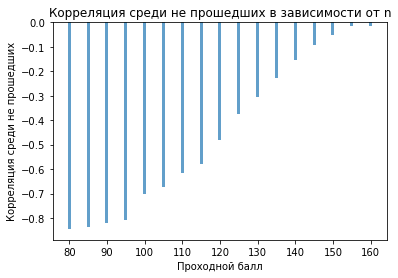

In [58]:
import numpy as np
import random
import seaborn as sns

N = 10**4
np.random.seed(7777)
Math = np.random.normal(60, 10, size = (17, N))
np.random.seed(2222)
Rus = np.random.normal(60, 10, size = (17, N))
Result = Math + Rus
Prohod = np.array(range(80, 165, 5))
Bul = Result >= Prohod.reshape((17, 1))

def Kor(Mas):
    Korr = []
    for i in range(17):
        Korr.append(np.corrcoef(Math[i][Mas[i]], Rus[i][Mas[i]])[0, 1])
    plt.bar(Prohod, Korr, alpha=0.7)
    plt.xlabel('Проходной балл')
    plt.show()

#Задание 1
plt.bar(Prohod, np.sum(Bul, axis = 1), alpha=0.7)
plt.title('Число прошедших в зависимости от n')
plt.xlabel('Проходной балл')
plt.ylabel('Количество прошедших')
plt.show()

#Задание 2
plt.title('Корреляция среди прошедших в зависимости от n')
plt.ylabel('Корреляция среди прошедших')
Kor(Bul)

#Задание 3
plt.title('Корреляция среди не прошедших в зависимости от n')
plt.ylabel('Корреляция среди не прошедших')
Kor(Bul == 0)

Парадокс Штайна

Графики для Волка


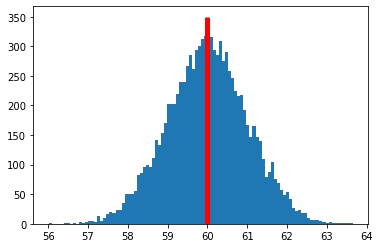

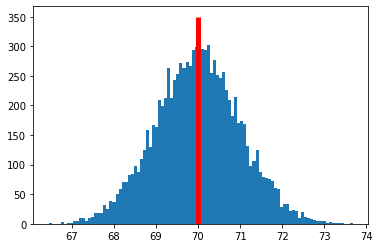

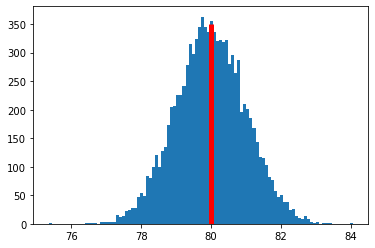

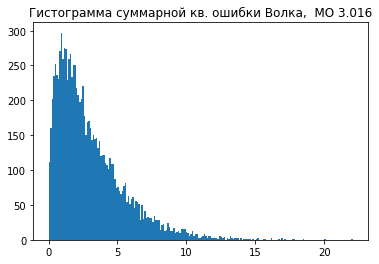

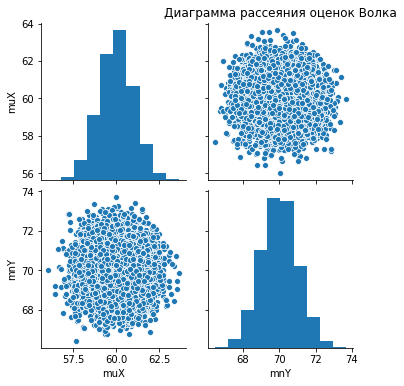

Выборочная корреляция оценок Волка:  -0.005388754045667087

Графики для Лиса


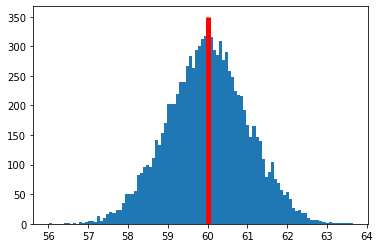

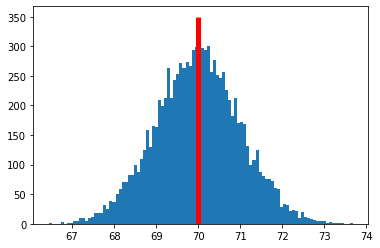

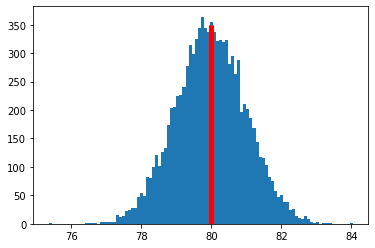

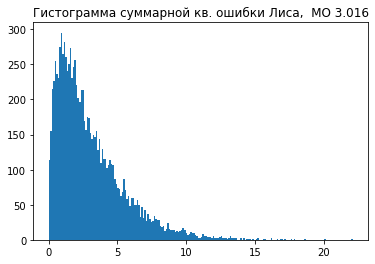

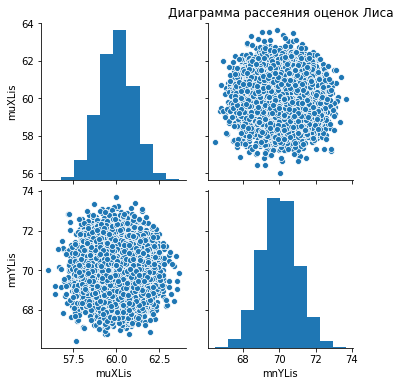

Выборочная корреляция оценок Лиса:  -0.005314262648553319


In [80]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

N = 10**4
X = np.random.normal(60, 10, size = (N, 100))
Y = np.random.normal(70, 10, size = (N, 100))
Z = np.random.normal(80, 10, size = (N, 100))

muX = []
muY = []
muZ = []
for i in range(N):
    muX.append(stats.norm.fit(X[i])[0])
    muY.append(stats.norm.fit(Y[i])[0])
    muZ.append(stats.norm.fit(Z[i])[0])

def nomer1(MAS, MAT):  
    plt.hist(MAS, bins = 100);
    plt.vlines(MAT, 0, 350, color='red', linewidth=5);
    plt.show()
print('Графики для Волка')
#NUMBER1
nomer1(muX, 60)
nomer1(muY, 70)
nomer1(muZ, 80)

#NUMBER2
S = []
for i in range(N):
    S.append((60-muX[i])**2 + (70-muY[i])**2 + (80-muZ[i])**2)
plt.hist(S, bins = 200);
plt.title('Гистограмма суммарной кв. ошибки Волка,  МО ' + str(round(sum(S) / N, 3)))
plt.show()

#NUMBER3
sns_plot = sns.pairplot(pd.DataFrame({'muX' : muX,'mnY' : muY}))
plt.title('Диаграмма рассеяния оценок Волка')
plt.show()
print('Выборочная корреляция оценок Волка: ', np.corrcoef(muX, muY)[0][1])

#LIS
print()
print('Графики для Лиса')
K = []
for i in range(N):
    K.append(1 - 1/(muX[i]**2+muY[i]**2+muZ[i]**2))
K = np.array(K)
muXLis = muX * K
muYLis = muY * K
muZLis = muZ * K

nomer1(muXLis, 60)
nomer1(muYLis, 70)
nomer1(muZLis, 80)

S = []
for i in range(N):
    S.append((60-muXLis[i])**2 + (70-muYLis[i])**2 + (80-muZLis[i])**2)
plt.hist(S, bins = 200);
plt.title('Гистограмма суммарной кв. ошибки Лиса,  МО ' + str(round(sum(S) / N, 3)))
plt.show()

sns_plot = sns.pairplot(pd.DataFrame({'muXLis' : muXLis,'mnYLis' : muYLis}))
plt.title('Диаграмма рассеяния оценок Лиса')
plt.show()
print('Выборочная корреляция оценок Лиса: ',np.corrcoef(muXLis, muYLis)[0][1])
